Solar Data collection and processing

Solar energy data for the area of Alice Springs is retrieved from http://reg.bom.gov.au/climate/reg/oneminsolar/. Since the activity data is from the year 2014, the extracted data for the solar energy will also be from 2014. 

The collected solar data is per each minute of that year. The data is required to be per 10 minutes. 

Calling the required packages.

In [202]:
import os
import numpy as np
import urllib.request
import pandas as pd
from matplotlib import pyplot as plt

First, calling the collumns 3 to 8, which contain the information for year, month, day, hour, min and global solar irridance. 

In [226]:
solar_data_2014_01 = np.genfromtxt('C:/Users/carol/Documents/Universität/DTU/02443/Project/2014/sl_2014_01.txt', 
                                   delimiter = ",", dtype = float, usecols =(2,3,4,5,6,7), skip_header=True)


The size of the matrix should be day * x * hours per day * x * minutes per hour which is equal to 44640 times six rows. The dtype of the matrix should be floats. 

In [227]:
print(solar_data_2014_01.shape)
print(solar_data_2014_01.dtype)

(44640, 6)
float64


Next, checking if there are empty entries. 

In [230]:
print(sum(np.isnan(solar_data_2014_01)))

[  0   0   0   0   0 330]


So, from the above it can be seen that there are 330 'NaN' in the last column. We decided to change those NaNs with the entry for the same time from the day before. So we use the entry 1440 entries further up.  To check we print again the sum of all NaNs in our matrix. 

In [232]:
nans = np.argwhere(np.isnan(solar_data_2014_01))
rows = nans[:,0]
for i in rows:
    solar_data_2014_01[i,5] = solar_data_2014_01[i-1440,5]
print(np.argwhere(np.isnan(solar_data_2014_01)))

[]


We create the final data frame by summing 10 rows of the 5th column. 

In [233]:
leng = len(solar_data_2014_01[:,5])

pro_data_2014_01 = []
time_min = []

i = 0
while i < leng:
    range_data = solar_data_2014_01[range(i,(i+9)),5]
    pro_data_2014_01.append(sum(range_data))
    time_min.append(i)
    i = i+ 10

Jan = [1]*len(time_min) 
final_data_frame = pd.DataFrame(
    {'Date': Jan,
    'Time': time_min,
    'Global Solar Data': pro_data_2014_01})
print(final_data_frame)

      Date  Global Solar Data   Time
0        1               0.00      0
1        1               0.00     10
2        1               0.00     20
3        1               0.00     30
4        1               0.00     40
5        1               0.00     50
6        1               0.00     60
7        1               0.00     70
8        1               0.00     80
9        1               0.00     90
10       1               0.00    100
11       1               0.00    110
12       1               0.00    120
13       1               0.00    130
14       1               0.00    140
15       1               0.00    150
16       1               0.00    160
17       1               0.00    170
18       1               0.00    180
19       1               0.00    190
20       1               0.00    200
21       1               0.00    210
22       1               0.00    220
23       1               0.00    230
24       1               0.00    240
25       1               0.00    250
2

Creating a plot to check if the data makes sense. 

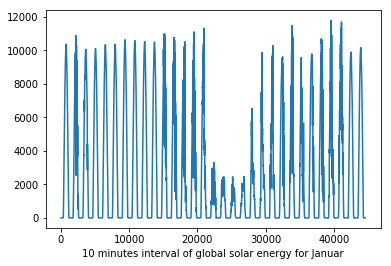

In [238]:
plt.plot(time_min, pro_data_2014_01)
plt.xlabel('10 minutes interval of global solar energy for Januar')
plt.show()